<a href="https://colab.research.google.com/github/m607stars/Machine-Learning-Algorithms/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and data

In [ ]:
#We import the necessary libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  


from sklearn.cluster import KMeans    #To implement KMeans
from math import sqrt
from sklearn.datasets.samples_generator import make_blobs   #To generate random datapoints 

# Making Random Dataset 

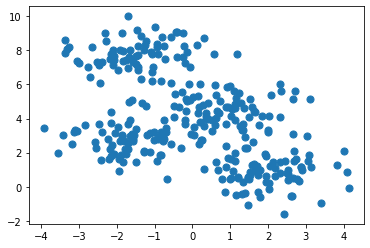

In [ ]:
#We give the centroids as 4, and no. of datapoints as 300
#We also take the standard deviation of clusters as 0.9 so that the datapoints are not easily separable
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.90, random_state=0)    
plt.scatter(X[:, 0], X[:, 1], s=50)                  #We plot the datapoints 

# Finding Optimum Clusters 
We need to first find the optimum clusters as we can't always guess how many classes would be there in dataset. So we do this by finding the inertia of the KMeans algorithm applied by setting the value of groups from 1 to 20. For larger datasets, one can even do the calculations for as large as 50 different classes. After getting the inertia of all the different number of clusters, we  then see the maximum percent change for all the values starting from 1. 

In [ ]:
inertia_values = []    #Initialize an empty list 

#For finding the inertia of KMeans for different number of clusters (here 20)
for i in range (1,20):
  m = KMeans(n_clusters=i)     #store  KMeans in m
  m.fit(X)                     #Fit the data
  inertia_values.append(m.inertia_)   #Append the inertia into the list inertia_values

#print Inertia_values
inertia_values

[3079.6849468163646,
 1429.3077585140034,
 795.3236124003193,
 454.3778700005048,
 401.4544706029594,
 351.7148170504679,
 309.23746248987425,
 279.85245512702625,
 241.49375625904983,
 219.6856269579497,
 200.67444954725406,
 184.25231038542174,
 171.5930017567952,
 158.8476669434603,
 149.0759406083931,
 140.5961919422749,
 132.12385577599244,
 121.74902338340388,
 116.71731896922452]

In [ ]:
#We Convert the inertia_values into dataframe for plottinf it easily
df = pd.DataFrame({'Cluster':range(1,20),'inertia_values':inertia_values})  
df

,Cluster,inertia_values
0,1,3079.684947
1,2,1429.307759
2,3,795.323612
3,4,454.377870
4,5,401.454471
5,6,351.714817
6,7,309.237462
7,8,279.852455
8,9,241.493756
9,10,219.685627


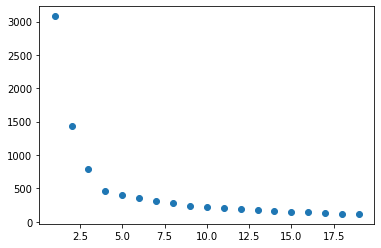

In [ ]:
#We plot the inertia_values
plt.scatter(df['Cluster'],df['inertia_values'])

We have optimum 4 clusters since the maximum difference in the slope of the curve occurs at x=4 i.e. 4 clusters. We can interpret this as the max change of the first derivative of the curve i.e. the second derivative must be zero

# K-Means Implementation using sklearn library

In [ ]:
#We now implement the K-means Clustering algorithm for 4 clusters as obtained from the previous cell 

model = KMeans(n_clusters=4)   #store  KMeans in model
model.fit(X)                   #Fit the data
y_pred = model.predict(X)      #Predict the Y-values

y_pred

array([0, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 0, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 1, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 3, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 3, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 0, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 0, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 3, 3, 0, 2, 3, 0, 0, 3, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 2, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 3, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0], d

In [ ]:
#Count the number of y_predicted values for each class
pd.Series(y_pred).value_counts()  

0    78
2    75
3    74
1    73
dtype: int64

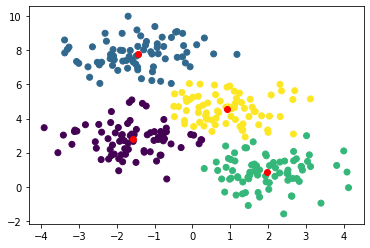

In [ ]:
#Plot the predicted classes and centroids of clusters 
plt.scatter(X[:, 0], X[:, 1], c=y_pred)   #plotting the data points
centers = model.cluster_centers_          #storing the centroids in centers
plt.scatter(centers[:, 0], centers[:, 1],color='black')   #plotting centres